In [1]:

from scipy import stats

import matplotlib.pyplot as plt
import numpy as np

import numpy.random as rd

import pandas as pd 

from tqdm import tqdm
import math

In [2]:
# parameter
mus = 5
sigmas = 1

In [85]:
# うまく行った場合の正規分布の乱数

arr = np.random.normal(mus,sigmas, 10)
print(arr)

[ 4.29021187  6.32200042  4.20845403  5.42044403  6.15883516  7.37037154
  3.68566301  4.72828251  4.23083437  4.41681099]


# 確率分布の定義

In [5]:
# 遅いバージョン
"""
def h(x, mu, sigma):
    return -1 * np.log(stats.norm.pdf(x=x, loc=mu, scale=sigma) )
    
"""

'\ndef h(x, mu, sigma):\n    return -1 * np.log(stats.norm.pdf(x=x, loc=mu, scale=sigma) )\n    \n'

In [6]:
# 遅いバージョン
"""
def delta_h(x, mu, sigma):
    return  -1*stats.norm.pdf(x=x, loc=mu, scale=sigma)*(x-mus)/ (sigma )
"""

'\ndef delta_h(x, mu, sigma):\n    return  -1*stats.norm.pdf(x=x, loc=mu, scale=sigma)*(x-mus)/ (sigma )\n'

In [48]:
def h(x, mu, sigma):
    return (x-mu)**2/2 * sigma

In [49]:
def delta_h(x, mu, sigma):
    return  x/sigma - mu/sigma

In [70]:
delta_h(5, mus, sigmas)

0.0

In [71]:
def hamiltonian(x,mu, sigma,p):
    return h(x, mu, sigma) + 0.5 * p**2

In [72]:
def leap_flog_step1(p, eta,x,mu, sigma):
    return p - 0.5*eta* delta_h(x, mu, sigma)

def leap_flog_step2(p, x, eta):
    return x + eta * p


In [73]:
def move_one_step(x,mu, sigma, p, eta, L=100, stlide=1):
    """
    リープフロッグ法でL回移動した１ステップを実行
    """
    ret = []
    ret.append([1, p, x, hamiltonian(x,mu, sigma,p)])
    for _ in range(L):
        p = leap_flog_step1(p, eta,x,mu, sigma)
        x = leap_flog_step2(p, x, eta)
        p = leap_flog_step1(p, eta,x,mu, sigma)
        ret.append([1, p, x, hamiltonian(x,mu, sigma,p)])
    return ret[::stlide]

In [74]:

# initial param
x = 3

p = 1
eta = 0.01
L = 100

result = move_one_step(x,mus, sigmas, p, eta, L, stlide=1)

In [75]:
result = np.array(result)
#HTML(pd.DataFrame(result, columns="p,x,hamiltonian".split(",")).to_html())
# type=1はリープフロッグ法による遷移を表す
pd.DataFrame(result, columns="type,p,x,hamiltonian".split(","))

,type,p,x,hamiltonian
0,1.0,1.000000,3.000000,4.500000
1,1.0,1.039796,3.020400,4.459404
2,1.0,1.079176,3.041592,4.417673
3,1.0,1.118124,3.063567,4.374874
4,1.0,1.156626,3.086317,4.331075
5,1.0,1.194664,3.109832,4.286346
6,1.0,1.232225,3.134103,4.240759
7,1.0,1.269293,3.159121,4.194387
8,1.0,1.305853,3.184875,4.147304
9,1.0,1.341890,3.211355,4.099585


200000

In [76]:
# HMC simulation
rd.seed(71)
scale_p = 1

# initial param
x = 2.5
p = rd.normal(loc=0,scale=scale_p)

T = 10000


sim_result = []
prev_hamiltonian = hamiltonian(x,mus, sigmas,p)
sim_result.append([ p, x, prev_hamiltonian, True])
for t in tqdm(range(T)):
    prev_p = p
    prev_x = x
    prev_hamiltonian = hamiltonian(x,mus, sigmas,p)
    for i in range(L):
        p = leap_flog_step1(p, eta,x,mus, sigmas)
        x = leap_flog_step2(p, x, eta)
        p = leap_flog_step1(p, eta,x,mus, sigmas)
        

    H = hamiltonian(x,mus, sigmas,p)
    r = np.exp(prev_hamiltonian-H)
    if  r > 1:
        sim_result.append([ p, x, hamiltonian(x,mus, sigmas,p), True])
    elif r > 0 and rd.uniform() < r:
        sim_result.append([ p, x,hamiltonian(x,mus, sigmas,p), True])
    else:

        sim_result.append([ p, x, hamiltonian(x,mus, sigmas,p), False])
        x = prev_x
    
    p = rd.normal(loc=0,scale=scale_p)
    
sim_result = np.array(sim_result)
df = pd.DataFrame(sim_result, columns="p,x,hamiltonian,accept".split(","))

100%|██████████| 10000/10000 [00:08<00:00, 1229.61it/s]


In [81]:
sum(df["accept"])/df["accept"].shape[0]

0.8828117188281172

In [82]:
df

,p,x,hamiltonian,accept
0,-0.430603,2.500000,6.342710,1.0
1,-0.999067,7.331781,5.936271,1.0
2,2.270484,3.693402,4.284747,1.0
3,-0.338206,6.337993,1.847417,1.0
4,0.317440,3.611117,1.979380,1.0
5,-0.376890,6.410978,2.061883,1.0
6,0.276373,3.497487,2.295735,1.0
7,-1.000699,6.141795,1.804395,1.0
8,1.347967,4.513401,1.145286,1.0
9,0.006221,5.584023,0.341102,1.0


(array([   47.,   214.,   753.,  1639.,  2416.,  2162.,  1198.,   457.,
          100.,    15.]),
 array([ 2.38959274,  2.93469001,  3.47978727,  4.02488453,  4.5699818 ,
         5.11507906,  5.66017632,  6.20527359,  6.75037085,  7.29546811,
         7.84056538]),
 <a list of 10 Patch objects>)

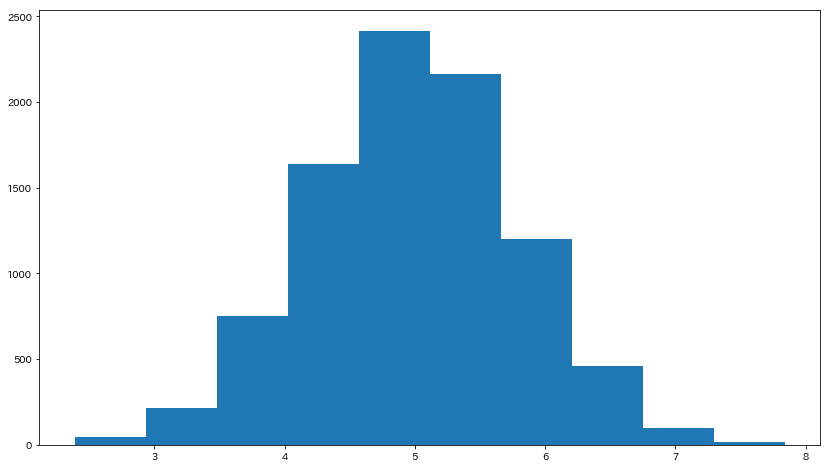

In [83]:
burn_in = int(T*0.1)
w = 0.05
n = len(sim_result[burn_in:])


plt.figure(figsize=(14,8))
plt.hist(sim_result[burn_in:,1])
